<a href="https://colab.research.google.com/github/raffiainuls/Rice-Leaf-Disease-Classification-CNN/blob/main/Splitting%26Augmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **PRE - PROCESSING**

In [ ]:
#import library 
import pandas as pd
import numpy as np
import os, cv2, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3

In [ ]:
leaf_smut_list = \
os.listdir('/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/rice_leaf_diseases/Leaf smut')
brown_spot_list = \
os.listdir('/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/rice_leaf_diseases/Brown spot')
bacterial_leaf_blight_list = \
os.listdir('/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/rice_leaf_diseases/Bacterial leaf blight')

print(len(leaf_smut_list))
print(len(brown_spot_list))
print(len(bacterial_leaf_blight_list))

40
40
40


In [ ]:
# Create val sets

df_leaf_smut = pd.DataFrame(leaf_smut_list, columns=['image'])
df_leaf_smut['target'] = 'leaf_smut'

df_brown_spot = pd.DataFrame(brown_spot_list, columns=['image'])
df_brown_spot['target'] = 'brown_spot'

df_bacterial_leaf_blight = pd.DataFrame(bacterial_leaf_blight_list, columns=['image'])
df_bacterial_leaf_blight['target'] = 'bacterial_leaf_blight'


# Create a val set for each class
# Sample 6 validation images from each class
df_leaf_smut_val = df_leaf_smut.sample(n=6, random_state=101)
df_brown_spot_val = df_brown_spot.sample(n=6, random_state=101)
df_bacterial_leaf_blight_val = df_bacterial_leaf_blight.sample(n=6, random_state=101)


print("Data Val")
print(len(df_leaf_smut_val))
print(len(df_brown_spot_val))
print(len(df_bacterial_leaf_blight_val))

Data Val
6
6
6


In [ ]:
# Create the train set for each class

# leaf_smut
# get a list of val images
val_list = list(df_leaf_smut_val['image'])
# filter out the val images
df_leaf_smut_train = df_leaf_smut[~df_leaf_smut['image'].isin(val_list)] # ~ means notin

# brown_spot
# get a list of val images
val_list = list(df_brown_spot_val['image'])
# filter out the val images
df_brown_spot_train = df_brown_spot[~df_brown_spot['image'].isin(val_list)] # ~ means notin

# bacterial_leaf_blight
# get a list of val images
val_list = list(df_bacterial_leaf_blight_val['image'])
# filter out the val images
df_bacterial_leaf_blight_train = \
df_bacterial_leaf_blight[~df_bacterial_leaf_blight['image'].isin(val_list)] # ~ means notin


print("Data Train")
print(len(df_leaf_smut_train))
print(len(df_brown_spot_train))
print(len(df_bacterial_leaf_blight_train))

Data Train
34
34
34


In [ ]:
# Create df_data, df_train and df_val

df_data = pd.concat([df_leaf_smut, df_brown_spot, df_bacterial_leaf_blight], axis=0).reset_index(drop=True)

df_train = \
pd.concat([df_leaf_smut_train, df_brown_spot_train, df_bacterial_leaf_blight_train], axis=0).reset_index(drop=True)

df_val = \
pd.concat([df_leaf_smut_val, df_brown_spot_val, df_bacterial_leaf_blight_val], axis=0).reset_index(drop=True)

df_data = shuffle(df_data)
df_train = shuffle(df_train)
df_val = shuffle(df_val)

print(df_data.shape)
print(df_train.shape)
print(df_val.shape)

(120, 2)
(102, 2)
(18, 2)


In [ ]:
df_data['target'].value_counts()

bacterial_leaf_blight    40
leaf_smut                40
brown_spot               40
Name: target, dtype: int64

In [ ]:
df_train['target'].value_counts()

bacterial_leaf_blight    34
leaf_smut                34
brown_spot               34
Name: target, dtype: int64

In [ ]:
df_val['target'].value_counts()

brown_spot               6
leaf_smut                6
bacterial_leaf_blight    6
Name: target, dtype: int64

In [ ]:
# Create the target as index values

# combine val, train and test
val_len = len(df_val)
train_len = len(df_train)
df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True)

# create the dummy variables
df_combined = pd.get_dummies(df_combined, columns=['target'])

# separate the train and val sets
df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

(102, 4)
(18, 4)


In [ ]:
df_combined.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0117.jpg,0,1,0
1,DSC_0510.jpg,0,0,1
2,DSC_0394.jpg,0,1,0
3,DSC_0383.JPG,1,0,0
4,DSC_0504.jpg,0,0,1


In [ ]:
df_train.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
18,DSC_0304.JPG,0,1,0
19,DSC_0370.jpg,1,0,0
20,DSC_0338.JPG,0,0,1
21,DSC_0513.jpg,0,0,1
22,DSC_0318.JPG,0,0,1


In [ ]:
df_val.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0117.jpg,0,1,0
1,DSC_0510.jpg,0,0,1
2,DSC_0394.jpg,0,1,0
3,DSC_0383.JPG,1,0,0
4,DSC_0504.jpg,0,0,1


In [ ]:
df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)

df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

# **AUGMENTASI DATA & SPLITTING DATA**

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders


base_dir = '/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/rice_leaf_diseases'
data_dir = '/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/dataset'

splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8, .19, .01),group_prefix=None)

Copying files: 120 files [02:00,  1.01s/ files]


In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/rice_leaf_diseases'

In [ ]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
import pathlib
data_dir ="/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/dataset"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/dataset/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/dataset/test'
val_path = '/content/drive/MyDrive/Colab Notebooks/Pembelajaran Mesin/ML_TugasKelompok/dataset/val'

In [ ]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

image_test_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

test_data_gen = image_test_gen.flow_from_directory(test_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(val_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 96 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

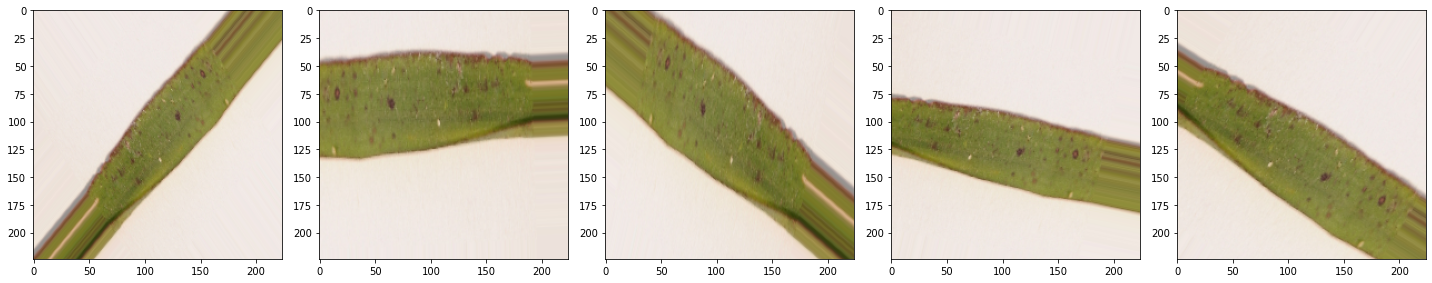

In [ ]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

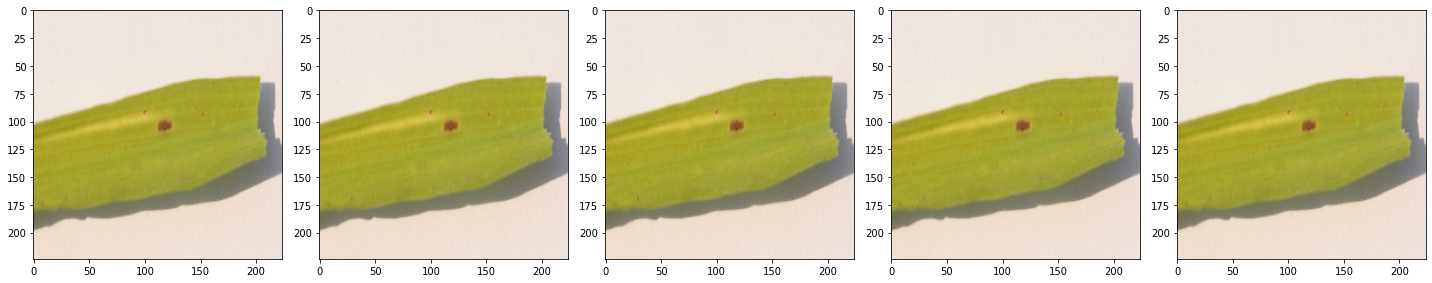

In [ ]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

**Melakukan augmentasi data menggunakan teknik image processing seperti (random noise, clahe, usuyama, blur, atau yang lainnya) dan ImageDataGenerator**

In [ ]:
def plt_imshow(title, image):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
args = {
	"image": "/content/DSC_0105.jpg"
}

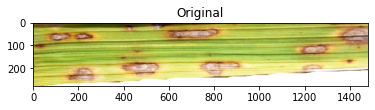

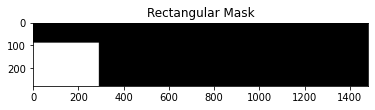

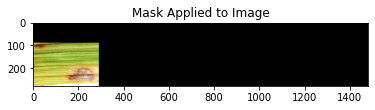

In [ ]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

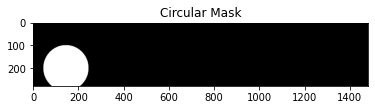

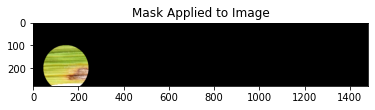

In [ ]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)